In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import pandas as pd
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
import numpy as np

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target


model = AgglomerativeClustering(n_clusters=3)
iris_df["pred_species"] = model.fit_predict(iris_df[iris.feature_names])


contingency = metrics.cluster.contingency_matrix(iris_df["species"], iris_df["pred_species"])


row_ind, col_ind = linear_sum_assignment(-contingency)  # maximize
mapping = dict(zip(col_ind, row_ind))


iris_df["mapped_pred"] = iris_df["pred_species"].map(mapping)


print("Accuracy after mapping:", metrics.accuracy_score(iris_df["species"], iris_df["mapped_pred"]))
print("\nClassification Report:\n", metrics.classification_report(iris_df["species"], iris_df["mapped_pred"]))


Accuracy after mapping: 0.8933333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.98      0.86        50
           2       0.97      0.70      0.81        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



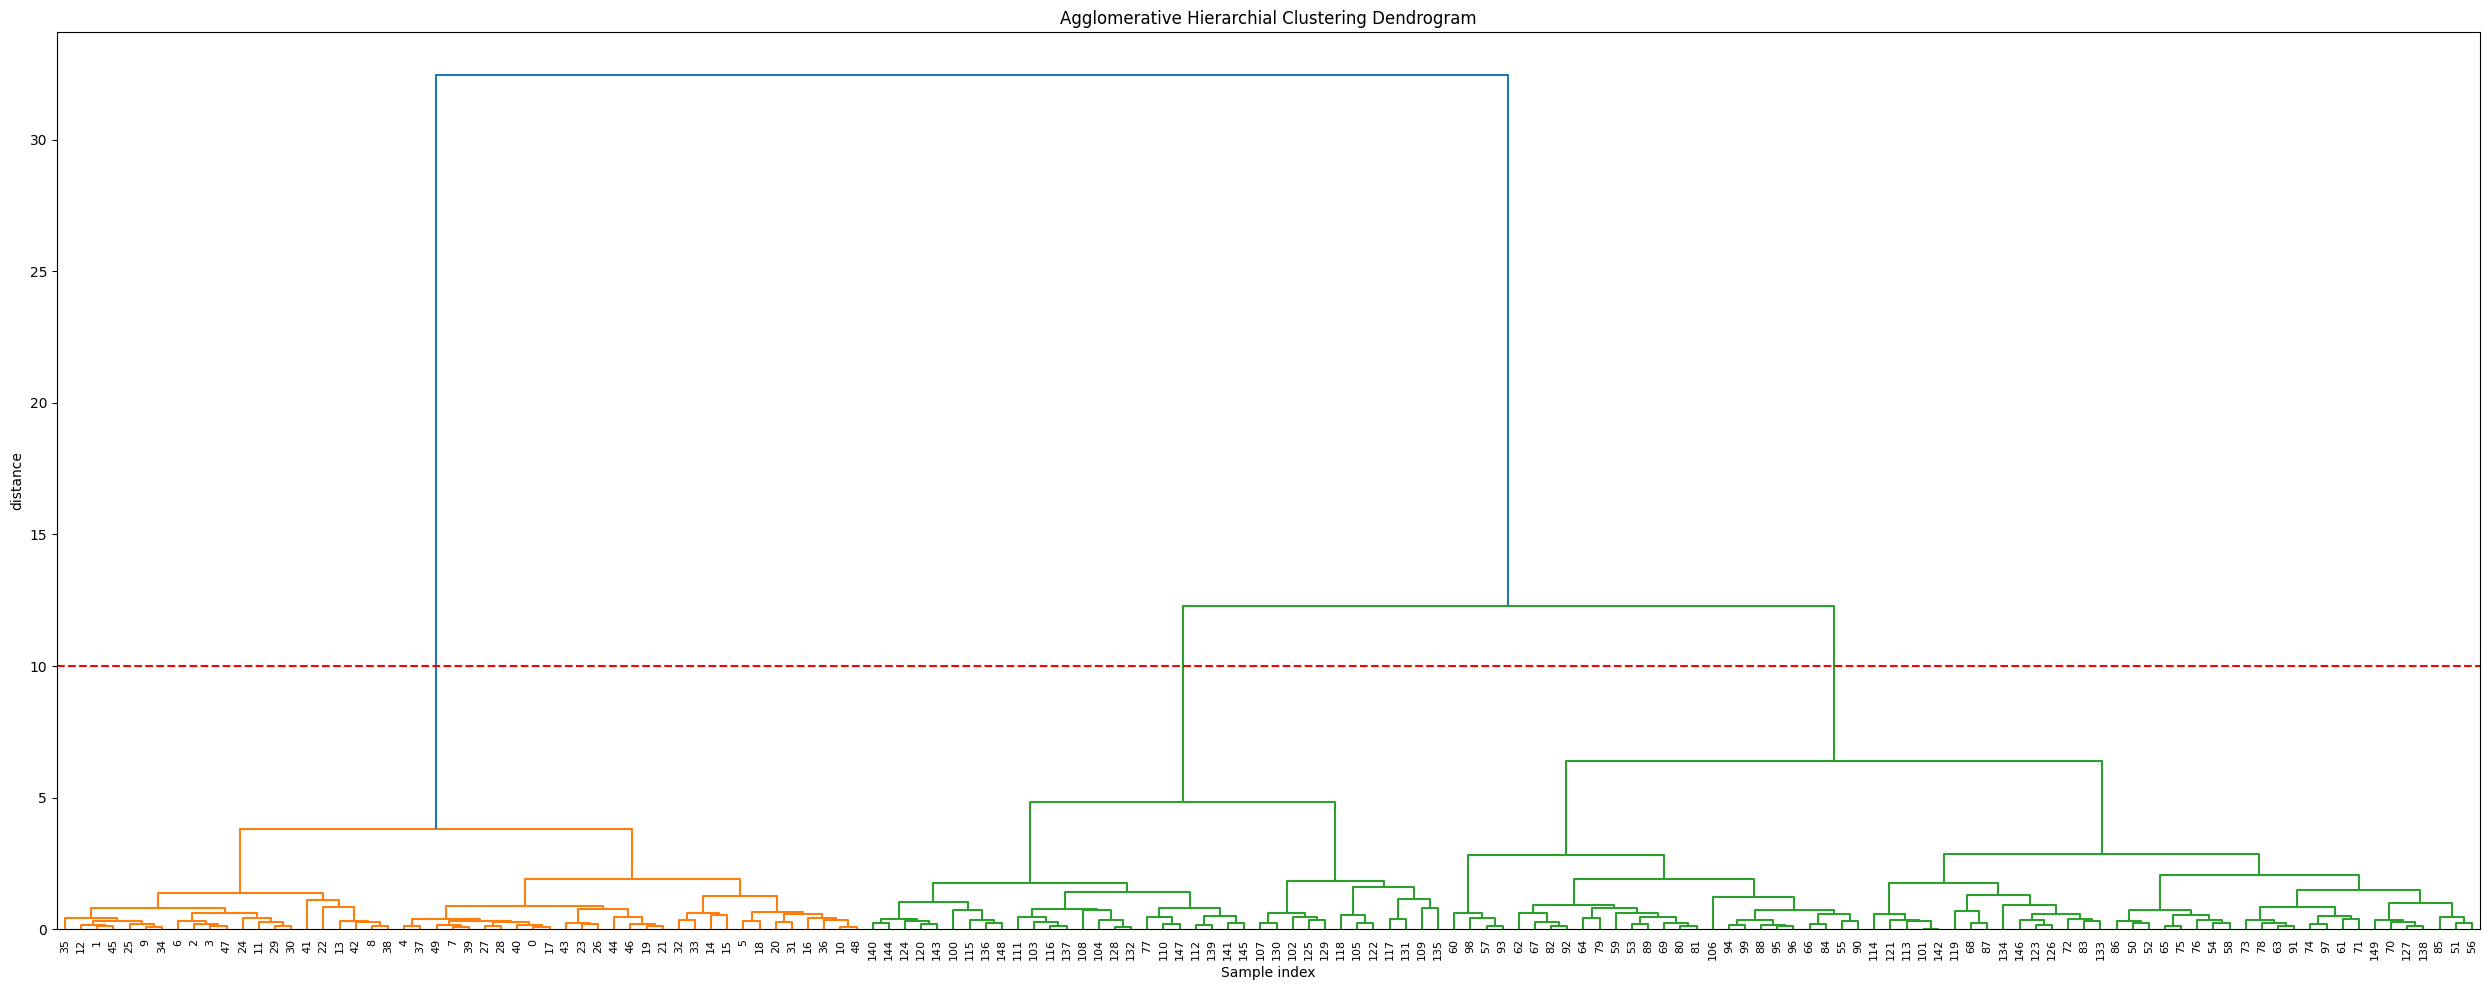

In [15]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
X = iris.data
Z=linkage(X,'ward')
c,coph_dists=cophenet(Z,pdist(X))

plt.figure(figsize=(25,10))
plt.title("Agglomerative Hierarchial Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("distance")
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,

)
plt.axhline(y=10, color='r', linestyle='--')
plt.tight_layout()